In [1]:
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
from PIL import Image

from tensorflow.keras.preprocessing import image
import cv2

In [2]:
train_ds_benign = "melanoma_cancer_dataset/train/benign"
train_ds_maligant = "melanoma_cancer_dataset/train/malignant"
test_ds_benign = "melanoma_cancer_dataset/test/benign"
test_ds_maligant = "melanoma_cancer_dataset/test/malignant"

In [3]:
# Získaj všetky obrázky v priečinku
obrazky = [f for f in os.listdir(train_ds_benign) if f.endswith(('png', 'jpg', 'jpeg'))]

In [4]:
# Získaj formáty obrázkov
formaty = [Image.open(os.path.join(train_ds_benign, obrazok)).format for obrazok in obrazky]


# Zisti všetky unikatné formáty
unikatne_formaty = set(formaty)

# Zobraz počet každého formátu
for format in unikatne_formaty:
    print(f"Formát {format}: {formaty.count(format)}")

Formát JPEG: 5000


In [5]:
prvy_obrazok= Image.open(os.path.join(train_ds_benign, obrazky[0]))

rozmery = prvy_obrazok.size
print(f'Rozmer prvého obrázka je: {rozmery}')


Rozmer prvého obrázka je: (300, 300)


In [6]:
# Počet obrázkov
print(f"Počet obrázkov: {len(obrazky)}")

Počet obrázkov: 5000


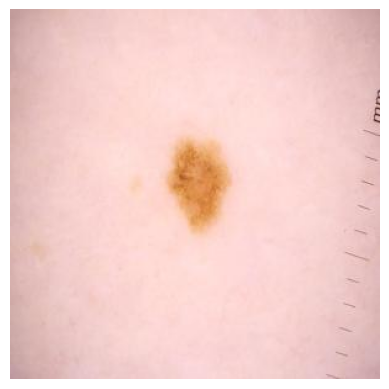

In [7]:
# Zobraz prvý obrázok
plt.imshow(prvy_obrazok)
plt.axis('off')  # Skryje osi
plt.show()

In [8]:
img1= cv2.imread('C:\\Users\\LOLSCROL\\PycharmProjects\\DS_final_project\\melanoma_cancer_dataset\\test\\benign\\melanoma_9605.jpg')

print(f"Shape obrázka: {img1.shape}")

Shape obrázka: (300, 300, 3)


In [9]:
# složky které obsahují třídy -> příklad pomíchám a znovu rozdělím train/test - nemusím
benign_file= [train_ds_benign, test_ds_benign]
malignant_file= [train_ds_maligant, test_ds_maligant]

In [10]:
# načíst cesty pro třídu benign
path_benign = []
for i in benign_file:
  print(i)
  for image in os.listdir(i):
    path_benign.append(f"{i}/{image}")

melanoma_cancer_dataset/train/benign
melanoma_cancer_dataset/test/benign


In [11]:
len(path_benign)

5500

In [12]:
# načíst cesty pro třídu malign
path_malign = []
for i in malignant_file:
  print(i)
  for image in os.listdir(i):
    path_malign.append(f"{i}/{image}")

melanoma_cancer_dataset/train/malignant
melanoma_cancer_dataset/test/malignant


In [13]:
len(path_malign)

5105

In [14]:
image = Image.open(path_malign[0])

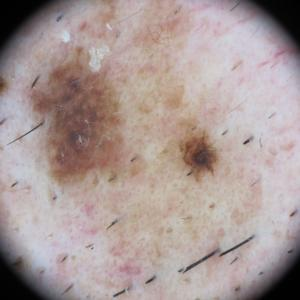

In [15]:
image

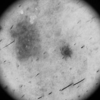

In [16]:
newsize = (100, 100)
im1 = image.resize(newsize)
im1 = im1.convert('L')
im1

In [17]:
# Resize fotiek na 100x100 a prevedenie na čiernobiele + pridanie do listu baw_im_benign
baw_im_benign = []
for image_path in path_benign:
  # načti fotku podle cesty
    image = Image.open(image_path)
    img = image.resize((100, 100))
    img = img.convert('L')
    baw_im_benign.append(img)

In [18]:
baw_im_malign = []
for image_path in path_malign:
  # načti fotku podle cesty
    image = Image.open(image_path)
    img = image.resize((100, 100))
    img = img.convert('L')
    baw_im_malign.append(img)

In [19]:
# Skontroluj rozmery prvého obrázku
print(baw_im_malign[0].size)

(100, 100)


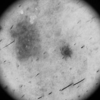

In [20]:
baw_im_malign[0]

Encoding obrázkov na numpy array farebných

In [21]:
# Resize fotiek na 224x224 (Input shape do MobileNET) a prevedenie (farebné) + pridanie do listu color_benign
color_benign = []
for image_path in path_benign:
  # načti fotku podle cesty
    image = Image.open(image_path)
    img = image.resize((224, 224))
    color_benign.append(img)

In [22]:
color_malign = []
for image_path in path_malign:
  # načti fotku podle cesty
    image = Image.open(image_path)
    img = image.resize((224, 224))
    color_malign.append(img)

In [23]:
array_color_benign = []
array_color_malignant = []
for image in color_benign:
    # zmena na array
    image_c_array = np.array(image)
    #pridaj do listu
    array_color_benign.append(image_c_array)

for image in color_malign:
    # zmena na array
    image_c_array = np.array(image)
    #pridaj do listu
    array_color_malignant.append(image_c_array)

In [24]:
array_color_benign[0].shape

(224, 224, 3)

In [25]:
print(len(array_color_benign))
print(len(array_color_malignant))

5500
5105


C:\Users\LOLSCROL\AppData\Local\Temp\ipykernel_10144\1690204250.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='viridis')


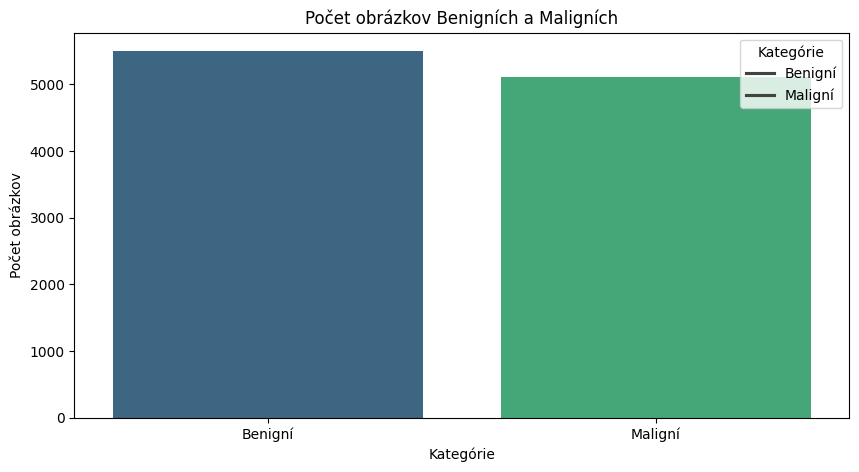

In [26]:
# Počet obrázkov pre každú kategóriu
counts = [len(array_color_benign), len(array_color_malignant)]
categories = ['Benigní', 'Maligní']

# Histogram počet obrázkov Benigních a Maligních
plt.figure(figsize=(10, 5))
sns.barplot(x=categories, y=counts, palette='viridis')
plt.xlabel('Kategórie')
plt.ylabel('Počet obrázkov')
plt.title('Počet obrázkov Benigních a Maligních')

# Pridanie legendy
plt.legend(categories, loc='upper right', title="Kategórie")
plt.show()

In [27]:
# Vytvorenie subsetu -> 
arraye_benign_subset = array_color_benign[:1000]
arraye_malign_subset = array_color_malignant[:1000]


In [28]:
labels_benign_subset = [0] * len(arraye_benign_subset)
labels_malign_subset = [1] * len(arraye_malign_subset)
X = np.array(arraye_benign_subset + arraye_malign_subset)
y = np.array(labels_benign_subset + labels_malign_subset)

In [29]:
'''
labels_benign = [0] * len(labels_benign_subset)
labels_malign = [1] * len(array_color_malignant)
X = np.array(array_color_benign + array_color_malignant)
y = np.array(labels_benign + labels_malign)
'''

'\nlabels_benign = [0] * len(labels_benign_subset)\nlabels_malign = [1] * len(array_color_malignant)\nX = np.array(array_color_benign + array_color_malignant)\ny = np.array(labels_benign + labels_malign)\n'

In [30]:
shapes = [x.shape for x in X]
print(set(shapes))

{(224, 224, 3)}


C:\Users\LOLSCROL\AppData\Local\Temp\ipykernel_10144\3897138134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='viridis')


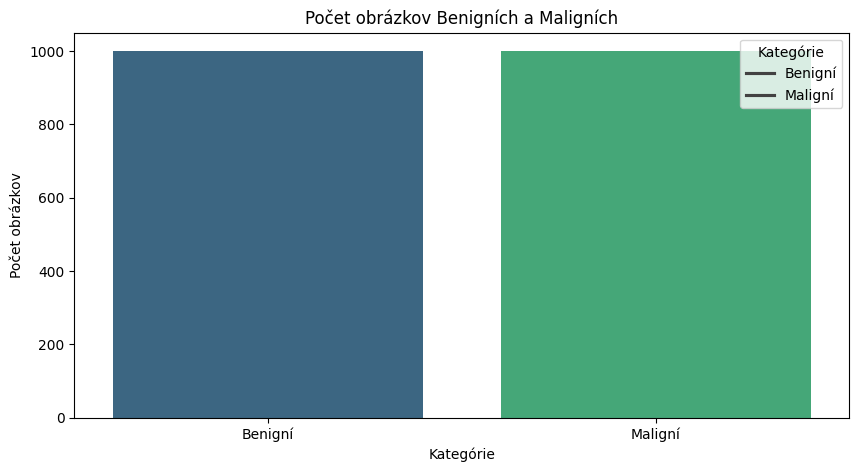

In [31]:
# Počet obrázkov pre každú kategóriu
counts = [len(labels_benign_subset), len(labels_malign_subset)]
categories = ['Benigní', 'Maligní']

# Histogram počet obrázkov Benigních a Maligních
plt.figure(figsize=(10, 5))
sns.barplot(x=categories, y=counts, palette='viridis')
plt.xlabel('Kategórie')
plt.ylabel('Počet obrázkov')
plt.title('Počet obrázkov Benigních a Maligních')

# Pridanie legendy
plt.legend(categories, loc='upper right', title="Kategórie")
plt.show()

Train test split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [34]:
print(f'Počet benigních v y_train: {np.sum(y_train==0)}')
print(f'Počet maligních v y_train: {np.sum(y_train==1)}')

total_pixels_benign = np.sum(X_train[y_train==0], axis=(1, 2))
total_pixels_malignant = np.sum(X_train[y_train==1], axis=(1, 2))
print(f'Celkový počet pixelov benigních: {total_pixels_benign.sum()}')
print(f'Celkový počet pixelov maligních: {total_pixels_malignant.sum()}')

Počet benigních v y_train: 800
Počet maligních v y_train: 800
Celkový počet pixelov benigních: 20554911177
Celkový počet pixelov maligních: 16992581773


In [35]:
print(f"Tréningová množina: {len(X_train)} vzoriek")
print(f"Testovacia množina: {len(X_test)} vzoriek")
print(f"Validačná množina: {len(X_val)} vzoriek")

Tréningová množina: 1600 vzoriek
Testovacia množina: 200 vzoriek
Validačná množina: 200 vzoriek


C:\Users\LOLSCROL\AppData\Local\Temp\ipykernel_10144\2800226831.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=count_train, palette='icefire', width=0.2).set_title('Class distribution in Training set', fontsize=15)
C:\Users\LOLSCROL\AppData\Local\Temp\ipykernel_10144\2800226831.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=count_val, palette='icefire', width=0.2).set_title('Class distribution in Validation set', fontsize=15)
C:\Users\LOLSCROL\AppData\Local\Temp\ipykernel_10144\2800226831.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

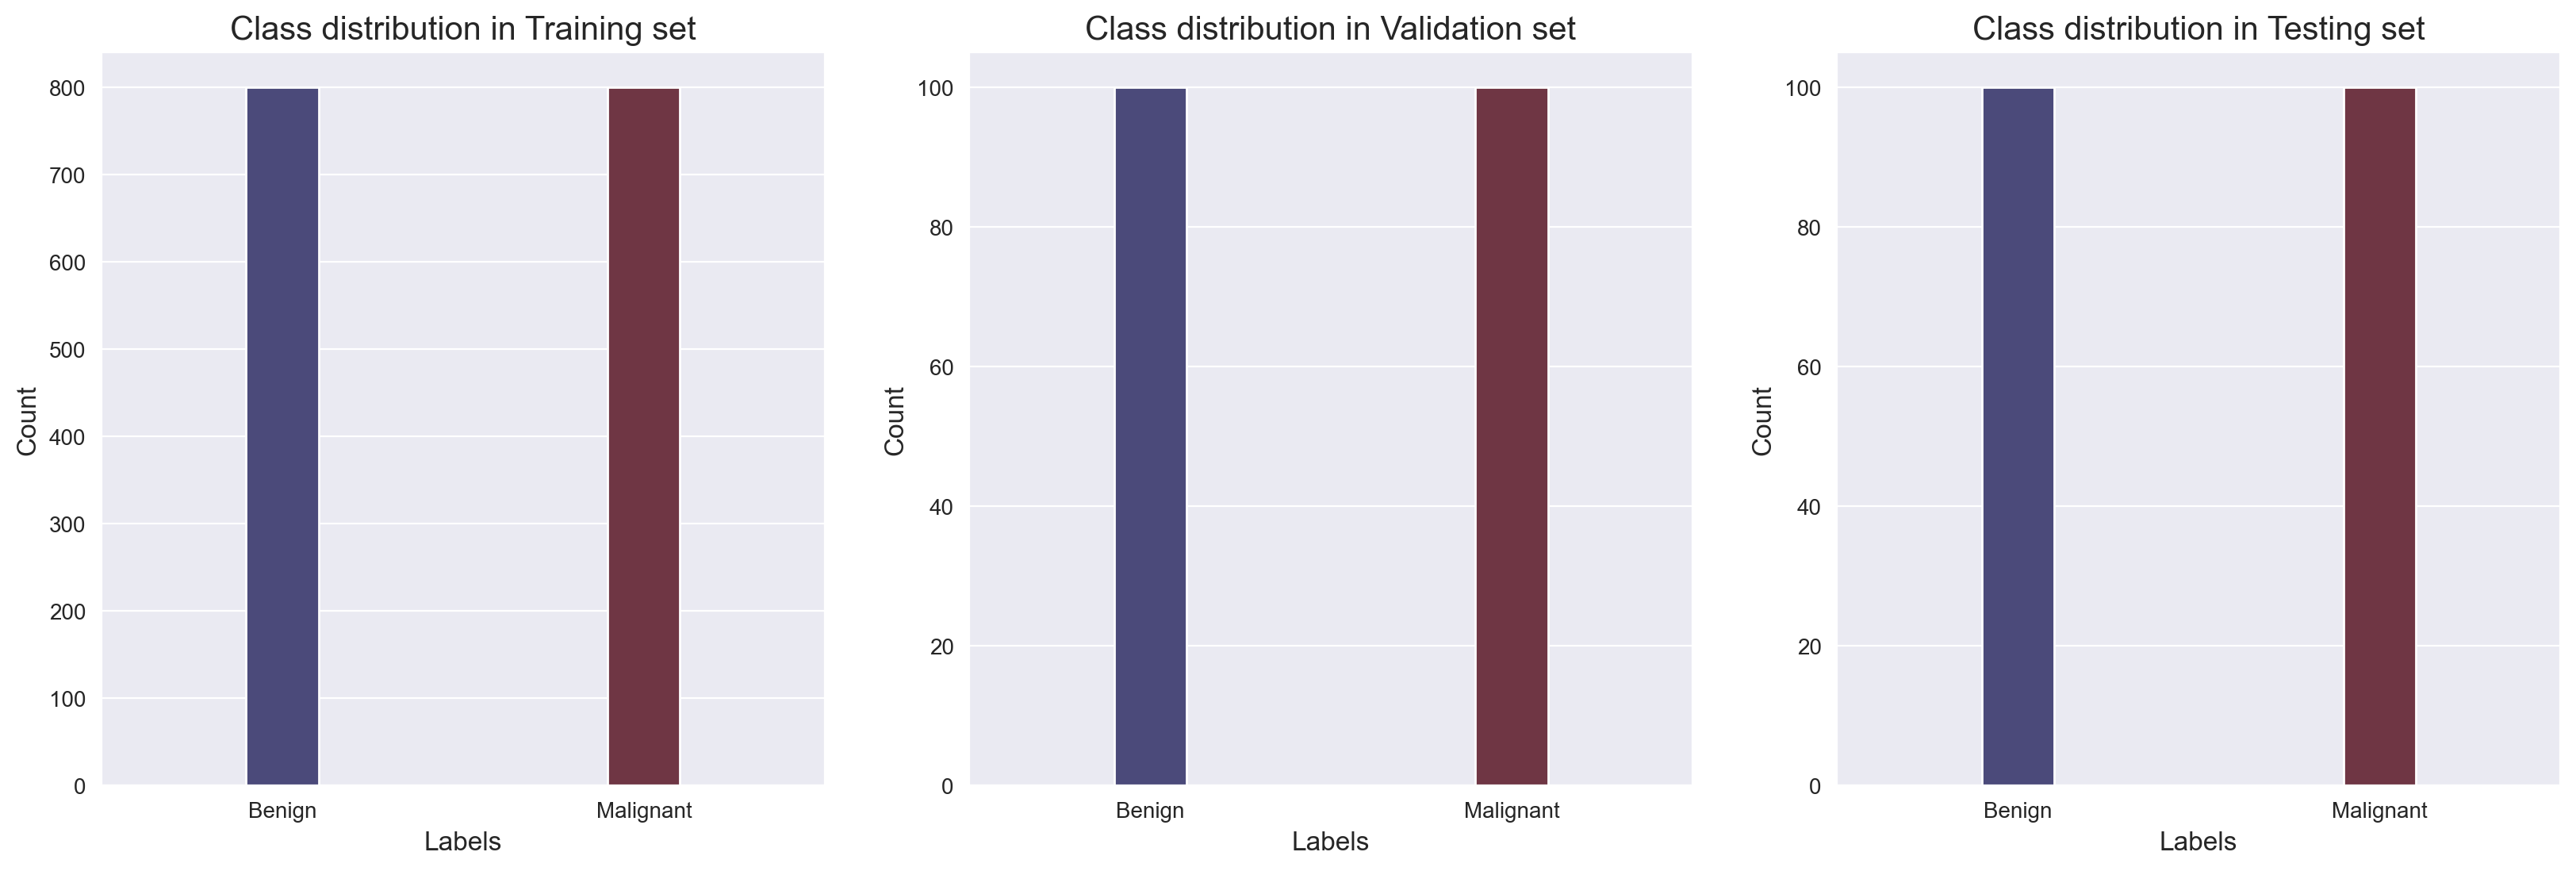

In [36]:
labels = ['Benign','Malignant']

# Spočítanie výskytov v jednotlivých splitoch
label_train, count_train = np.unique(y_train, return_counts=True)
label_val, count_val = np.unique(y_val, return_counts=True)
label_test, count_test = np.unique(y_test, return_counts=True)

# Vytvorenie figure a vykreslenie grafov
plt.figure(figsize=(20, 6), dpi=200)
sns.set_style('darkgrid')

# Tréningová množina
plt.subplot(131)
sns.barplot(x=labels, y=count_train, palette='icefire', width=0.2).set_title('Class distribution in Training set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Validačná množina
plt.subplot(132)
sns.barplot(x=labels, y=count_val, palette='icefire', width=0.2).set_title('Class distribution in Validation set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Testovacia množina
plt.subplot(133)
sns.barplot(x=labels, y=count_test, palette='icefire', width=0.2).set_title('Class distribution in Testing set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Zobrazenie grafov
plt.show()

Predtrénovaný model -> MobileNetV2

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import  accuracy_score, confusion_matrix
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
predtrenovany_model = keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), 
    include_top=False, 
    weights='imagenet')

for layer in predtrenovany_model.layers:
    layer.trainable = False

model = Sequential([
    predtrenovany_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,014,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,313,729 (24.08 MB)

 Trainable params: 4,055,745 (15.47 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Funkcia na ulozenie history priebežne
class SaveHistoryCallback(tf.keras.callbacks.Callback):
    def __init__(self, file_path):
        self.file_path = file_path
        self.history = {}

    def on_epoch_end(self, epoch, logs=None):
        # Ukladaj history priebežne
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)
        with open(self.file_path, 'w') as f:
            json.dump(self.history, f)

In [ ]:
mc_path = 'model.weights.h5'
history_saver = SaveHistoryCallback('history.json')

In [ ]:
# Compile model
model.compile(
    optimizer= Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Early stopping
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=5)

# Model checkpoint
mc = ModelCheckpoint(
    filepath = mc_path,
    save_weights_only=True, 
    monitor='val_accuracy', 
    mode='max', 
    verbose=1, 
    save_best_only=True)

# Fit model
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100, 
    batch_size=32, 
    callbacks=[es, mc, history_saver], 
    verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.6285 - loss: 1.0497
Epoch 1: val_accuracy improved from -inf to 0.82500, saving model to model.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6298 - loss: 1.0443 - val_accuracy: 0.8250 - val_loss: 0.3969
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.7936 - loss: 0.4332
Epoch 2: val_accuracy improved from 0.82500 to 0.84500, saving model to model.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 852ms/step - accuracy: 0.7936 - loss: 0.4332 - val_accuracy: 0.8450 - val_loss: 0.3302
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 754ms/step - accuracy: 0.8369 - loss: 0.3503
Epoch 3: val_accuracy improved from 0.84500 to 0.85500, saving model to model.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 856ms/step - accuracy: 0.8369 - loss: 0.3506 - val_accuracy: 0.8550 - val_loss: 0.3470
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - accuracy: 0.8612 - loss: 0.3402
Epoch 4: val_accuracy did not improve

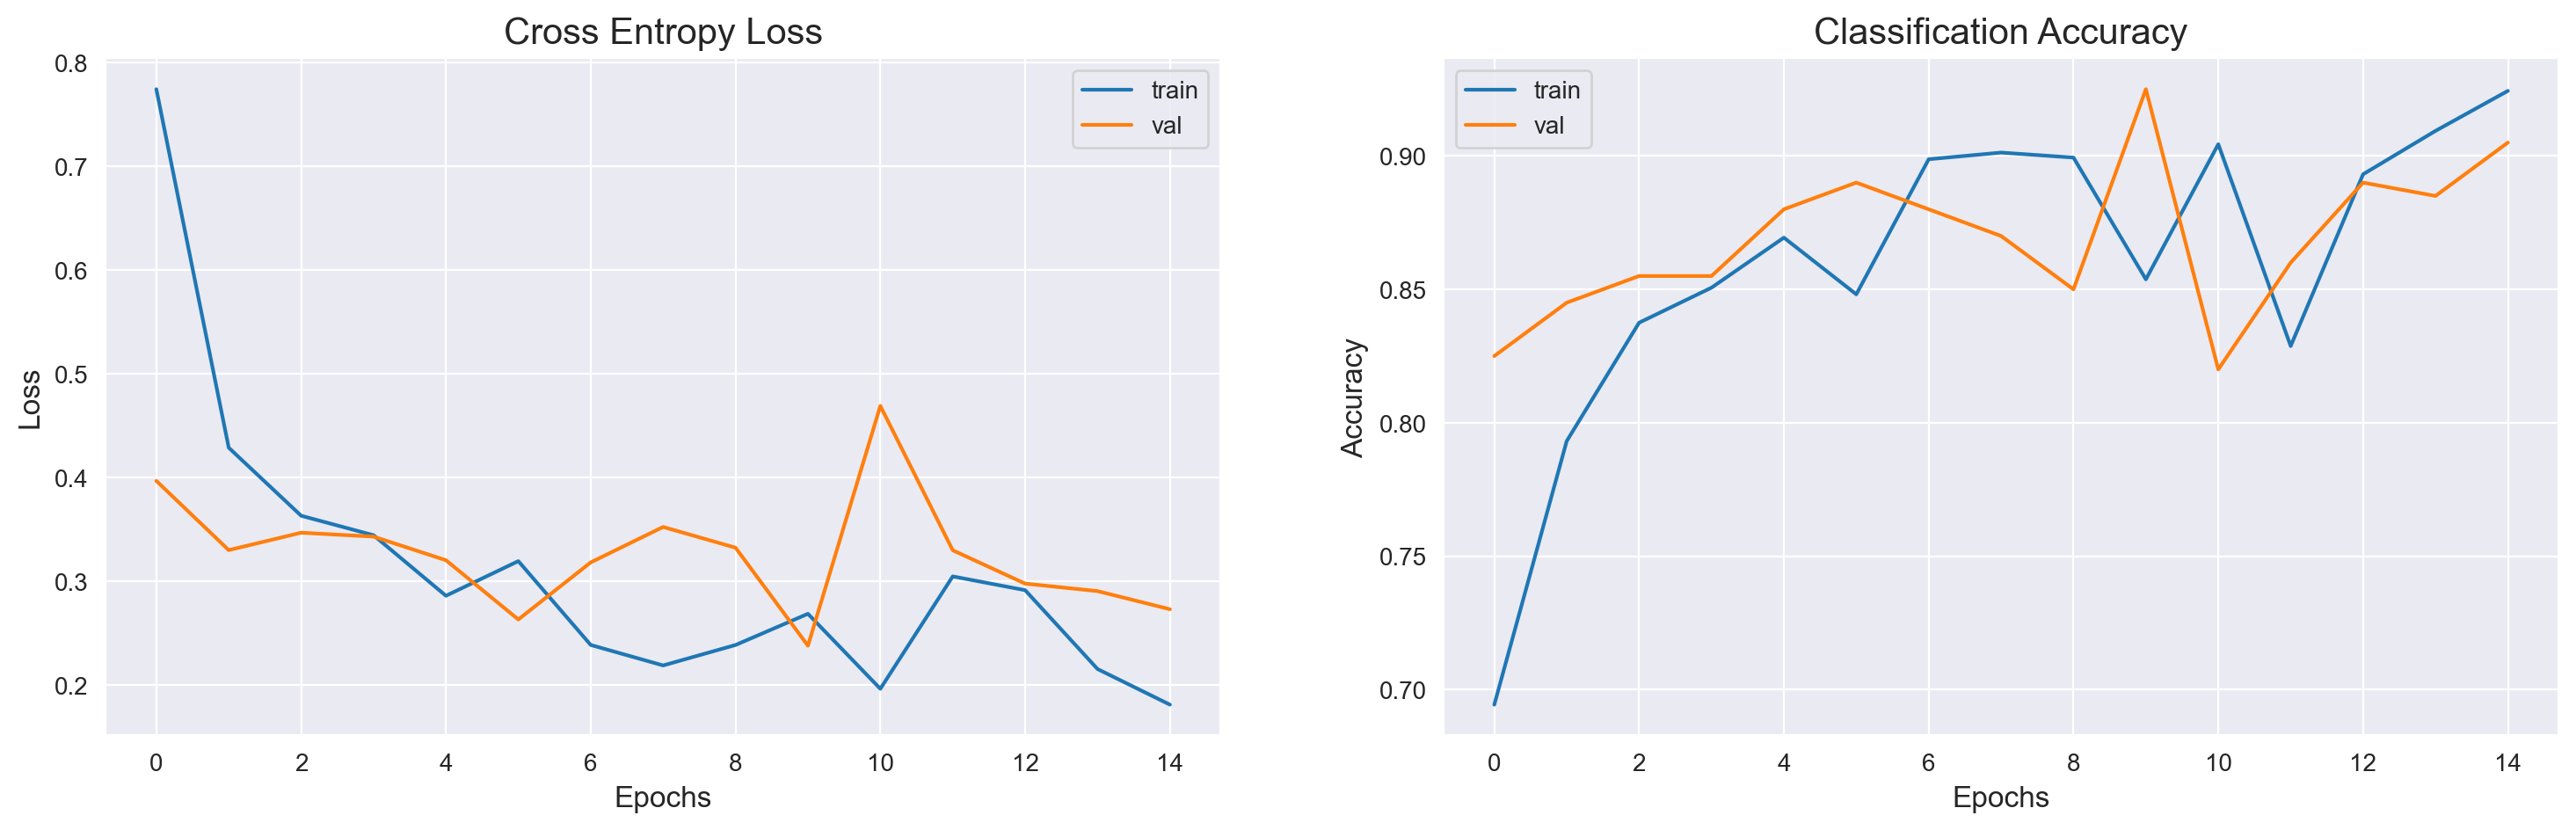

In [ ]:
error = pd.DataFrame(history.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])
plt.legend(['train','val'])

plt.show()

In [39]:
# Normalizácia obrázkov na rozsah [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0  

In [ ]:
predtrenovany_model = keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), 
    include_top=False, 
    weights='imagenet')

for layer in predtrenovany_model.layers:
    layer.trainable = False

model_MNV2 = Sequential([
    predtrenovany_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_MNV2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │     4,014,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,313,729 (24.08 MB)

 Trainable params: 4,055,745 (15.47 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
mc_path = 'model_MNV2.weights.h5'
history_saver = SaveHistoryCallback('history_MNV2.json')

In [ ]:
# Compile model
model_MNV2.compile(
    optimizer= Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Early stopping
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=5)

# Model checkpoint
mc = ModelCheckpoint(
    filepath = mc_path,
    save_weights_only=True, 
    monitor='val_accuracy', 
    mode='max', 
    verbose=1, 
    save_best_only=True)

# Fit model
history_MNV2 = model_MNV2.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100, 
    batch_size=32, 
    callbacks=[es, mc, history_saver], 
    verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6999 - loss: 0.8776
Epoch 1: val_accuracy improved from -inf to 0.90000, saving model to model_MNV2.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7013 - loss: 0.8724 - val_accuracy: 0.9000 - val_loss: 0.2436
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8712 - loss: 0.2834
Epoch 2: val_accuracy did not improve from 0.90000
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8714 - loss: 0.2834 - val_accuracy: 0.8450 - val_loss: 0.4216
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 933ms/step - accuracy: 0.8688 - loss: 0.2770
Epoch 3: val_accuracy did not improve from 0.90000
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8692 - loss: 0.2765 - val_accuracy: 0.8800 - val_loss: 0.2215
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 897ms/step - accuracy: 0.9128 - loss: 0.1892
Epoch 4: val_accuracy improved from 0.90000 to 0.92000, saving model to model_MNV2.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━

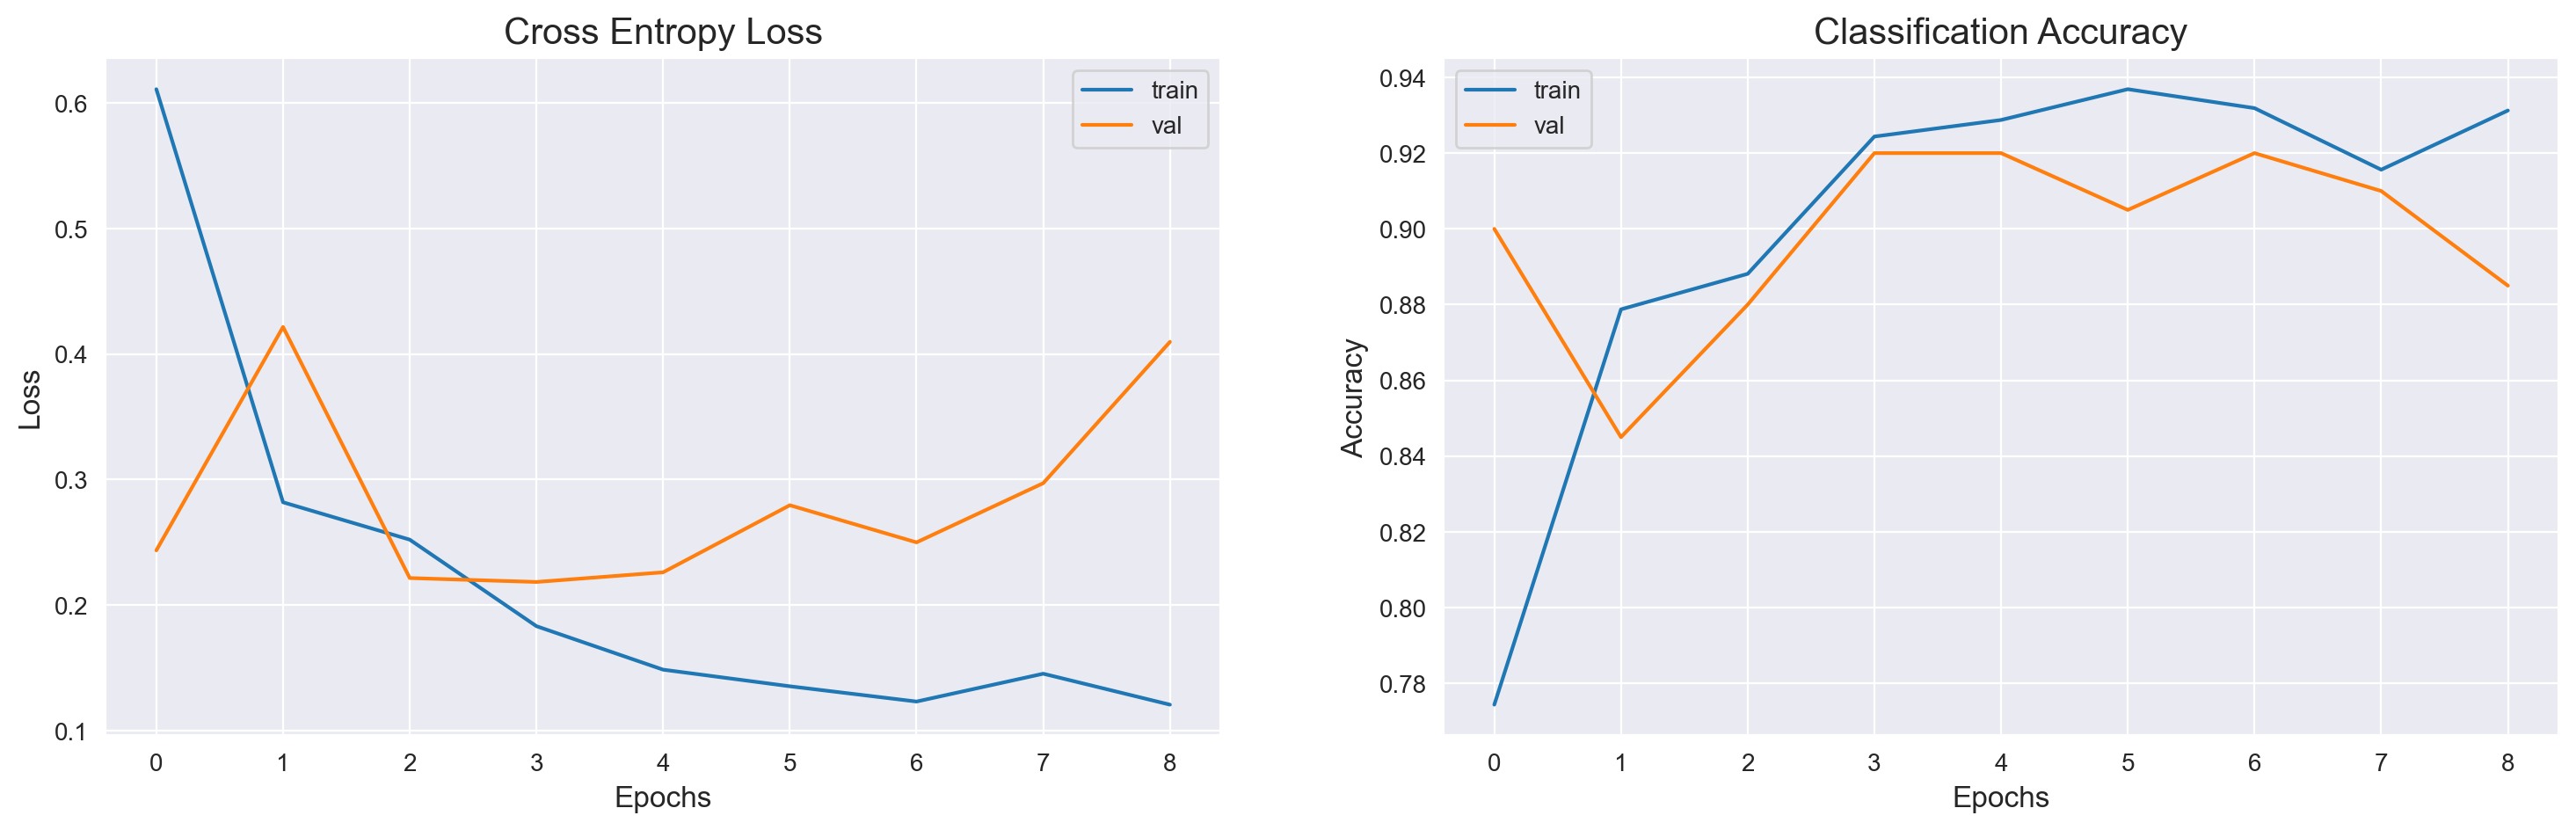

In [ ]:
error = pd.DataFrame(history_MNV2.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])
plt.legend(['train','val'])

plt.show()

Predtrénovaný model -> ResNet50V2

In [40]:
from keras.applications import ResNet50V2

In [ ]:
predtrenovany_modelRN = keras.applications.ResNet50V2(
    input_shape=(224, 224, 3), 
    include_top=False, 
    weights='imagenet')

for layer in predtrenovany_modelRN.layers:
    layer.trainable = False

model_ResNet = Sequential([
    predtrenovany_modelRN,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_ResNet.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,296,385 (188.05 MB)

 Trainable params: 25,731,585 (98.16 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
mc_path = 'modelResNet1.weights.h5'
history_saver = SaveHistoryCallback('history_ResNet1.json')

In [ ]:
# Compile model
model_ResNet.compile(
    optimizer= Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=10)

# Model checkpoint
mc = ModelCheckpoint(
    filepath = mc_path,
    save_weights_only=True, 
    monitor='val_accuracy', 
    mode='max', 
    verbose=1, 
    save_best_only=True)

# Fit model
historyResNet = model_ResNet.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100, 
    batch_size=32, 
    callbacks=[es, mc, history_saver], 
    verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6236 - loss: 2.9202
Epoch 1: val_accuracy improved from -inf to 0.87000, saving model to modelResNet1.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.6246 - loss: 2.9129 - val_accuracy: 0.8700 - val_loss: 0.5322
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7497 - loss: 1.1879
Epoch 2: val_accuracy improved from 0.87000 to 0.89500, saving model to modelResNet1.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.7500 - loss: 1.1839 - val_accuracy: 0.8950 - val_loss: 0.3289
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8158 - loss: 0.6123
Epoch 3: val_accuracy improved from 0.89500 to 0.91000, saving model to modelResNet1.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.8160 - loss: 0.6106 - val_accuracy: 0.9100 - val_loss: 0.3338
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8572 - loss: 0.3694
Epoch 4: val_accuracy did not i

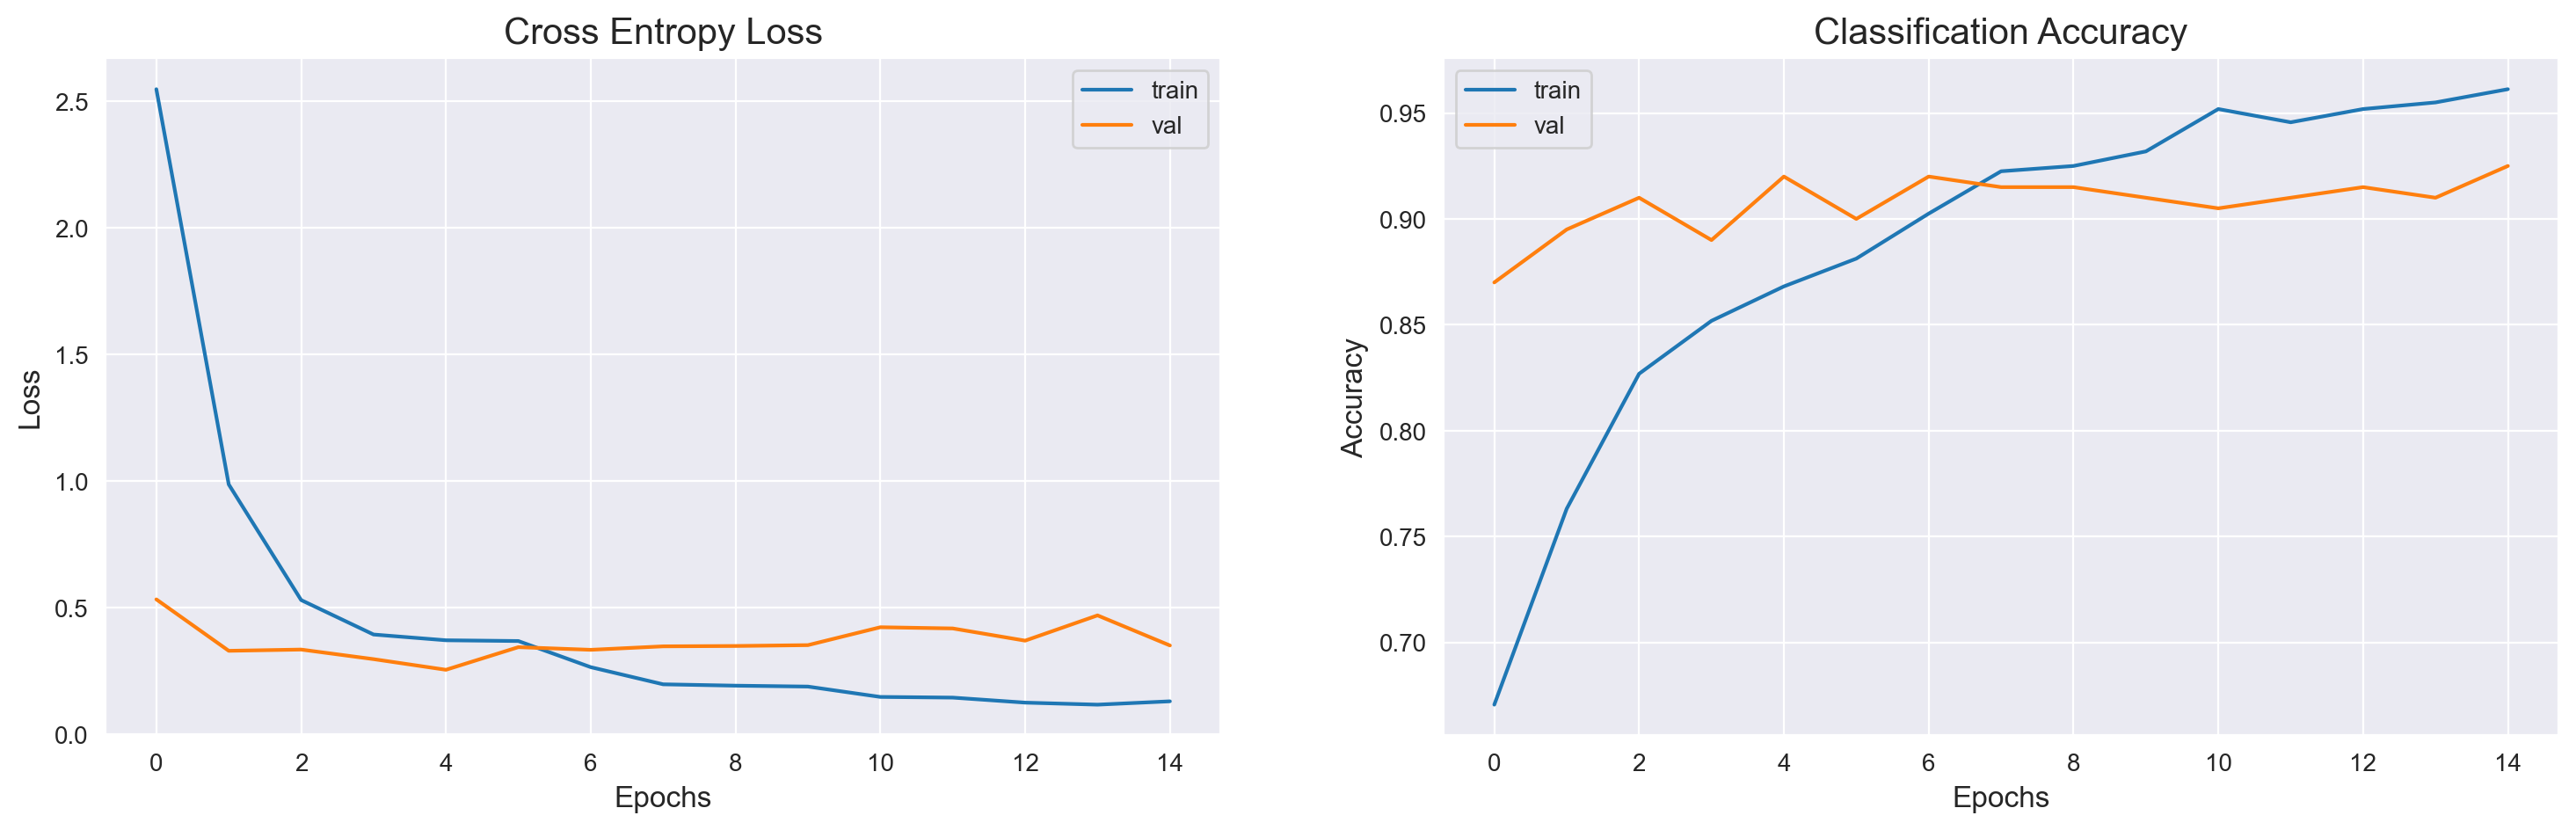

In [ ]:
error = pd.DataFrame(historyResNet.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])
plt.legend(['train','val'])

plt.show()

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical

MobileNet prediction

In [ ]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 765ms/step - accuracy: 0.5551 - loss: 4.7218


[4.449228286743164, 0.5799999833106995]

In [ ]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 878ms/step


In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

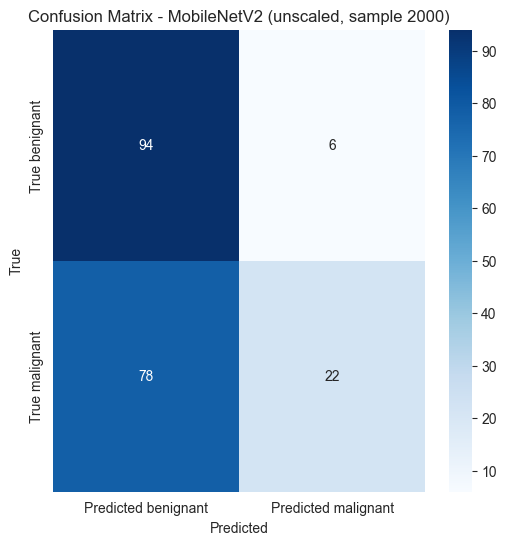

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.94      0.69       100
           1       0.79      0.22      0.34       100

    accuracy                           0.58       200
   macro avg       0.67      0.58      0.52       200
weighted avg       0.67      0.58      0.52       200



In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

#Vykreslenie Confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted benignant', 'Predicted malignant'], yticklabels=['True benignant', 'True malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - MobileNetV2 (unscaled, sample 2000)')
plt.show()

# Výpis klasifikačného reportu (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

In [ ]:
model_MNV2.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 764ms/step - accuracy: 0.8882 - loss: 0.4384


[0.4585542380809784, 0.8700000047683716]

In [ ]:
y_pred_MNV2 = model_MNV2.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step  


In [ ]:
y_pred_MNV2_binary = (y_pred_MNV2 > 0.5).astype(int)

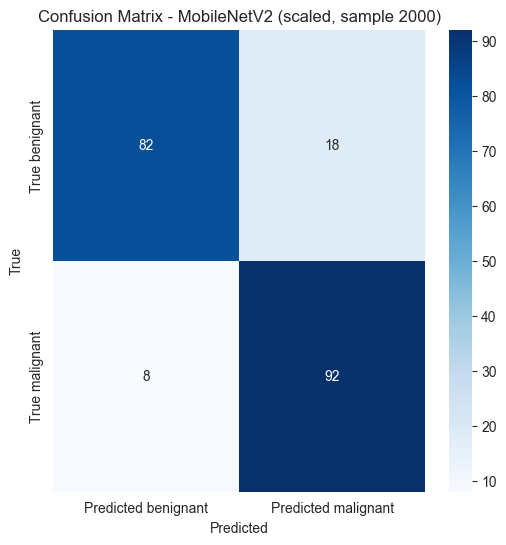

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       100
           1       0.84      0.92      0.88       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_MNV2_binary)

#Vykreslenie Confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted benignant', 'Predicted malignant'], yticklabels=['True benignant', 'True malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - MobileNetV2 (scaled, sample 2000)')
plt.show()

# Výpis klasifikačného reportu (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_MNV2_binary))

ResNet prediction

In [ ]:
model_ResNet.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8685 - loss: 0.5167


[0.3836134970188141, 0.8849999904632568]

In [ ]:
y_pred_resnet = model_ResNet.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step


In [ ]:
y_pred_resnet_binary = (y_pred_resnet > 0.5).astype(int)

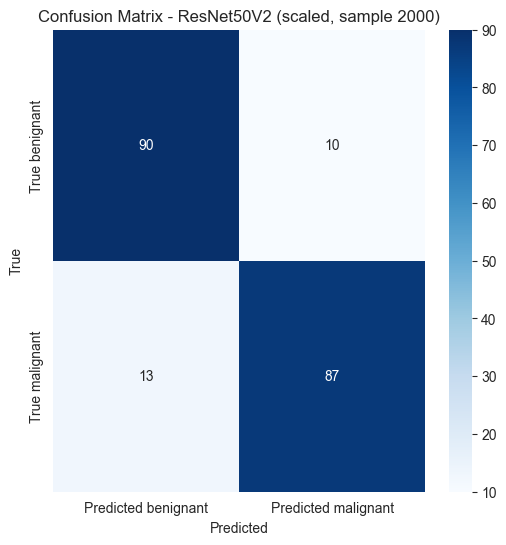

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       100
           1       0.90      0.87      0.88       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_resnet_binary)

#Vykreslenie Confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted benignant', 'Predicted malignant'], yticklabels=['True benignant', 'True malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - ResNet50V2 (scaled, sample 2000)')
plt.show()

# Výpis klasifikačného reportu (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_resnet_binary))

Trasnfer learning s augmentáciou dát

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=90,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

# Fit the data generator on training data
datagen.fit(X_train)

In [ ]:
predtrenovany_model = keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), 
    include_top=False, 
    weights='imagenet')

for layer in predtrenovany_model.layers:
    layer.trainable = False

model1_MNV2 = Sequential([
    predtrenovany_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model1_MNV2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │     4,014,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,313,729 (24.08 MB)

 Trainable params: 4,055,745 (15.47 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
mc_path = 'model1_MNV2.weights.h5'
history_saver = SaveHistoryCallback('history_MNV2_model1.json')

In [ ]:
# Compile model
model1_MNV2.compile(
    optimizer= Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Early stopping
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=5)

lr_reduction = ReduceLROnPlateau(
    monitor='val_loss', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

# Model checkpoint
mc = ModelCheckpoint(
    filepath = mc_path,
    save_weights_only=True, 
    monitor='val_accuracy', 
    mode='max', 
    verbose=1, 
    save_best_only=True)

# Fit model
history1_MNV2 = model1_MNV2.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100, 
    batch_size=32, 
    callbacks=[es, mc, history_saver, lr_reduction], 
    verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 930ms/step - accuracy: 0.7289 - loss: 0.7144
Epoch 1: val_accuracy improved from -inf to 0.89500, saving model to model1_MNV2.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7303 - loss: 0.7110 - val_accuracy: 0.8950 - val_loss: 0.2453 - learning_rate: 5.0000e-04
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - accuracy: 0.8860 - loss: 0.2619
Epoch 2: val_accuracy improved from 0.89500 to 0.90500, saving model to model1_MNV2.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8861 - loss: 0.2615 - val_accuracy: 0.9050 - val_loss: 0.2320 - learning_rate: 5.0000e-04
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - accuracy: 0.9170 - loss: 0.2003
Epoch 3: val_accuracy improved from 0.90500 to 0.91500, saving model to model1_MNV2.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9170 - loss: 0.2004 - val_accuracy: 0.9150 - val_loss: 0.2210 - learning_rate: 5.0000e-04
Epoch 4/100
50/50 ━━━━━━━━━━

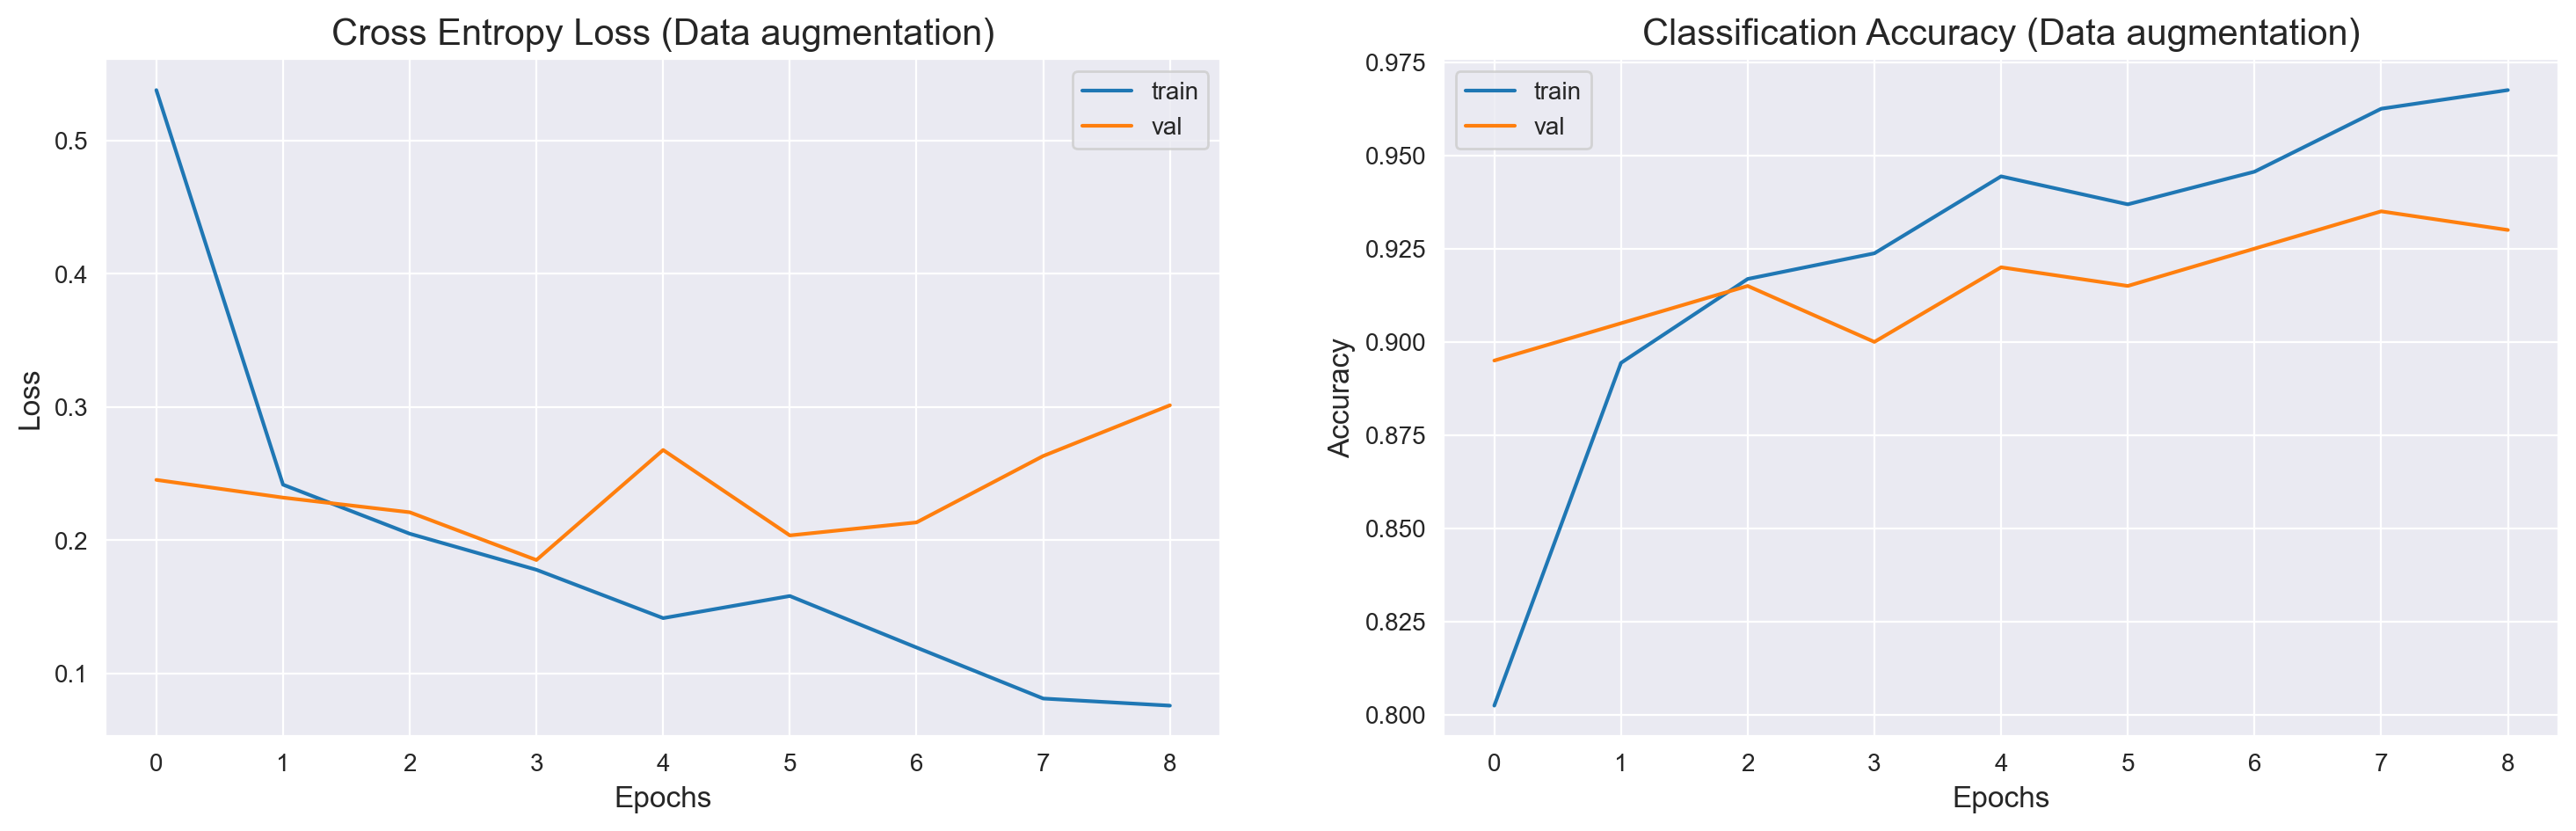

In [ ]:
error = pd.DataFrame(history1_MNV2.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss (Data augmentation)',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('Classification Accuracy (Data augmentation)',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])
plt.legend(['train','val'])

plt.show()

ResNet50V2 s augmentáciou dát

In [ ]:
predtrenovany_modelRN = keras.applications.ResNet50V2(
    input_shape=(224, 224, 3), 
    include_top=False, 
    weights='imagenet')

for layer in predtrenovany_modelRN.layers:
    layer.trainable = False

model1_ResNet = Sequential([
    predtrenovany_modelRN,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model1_ResNet.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,296,385 (188.05 MB)

 Trainable params: 25,731,585 (98.16 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
mc_path = 'modelResNet2.weights.h5'
history_saver = SaveHistoryCallback('history_ResNet2.json')

In [ ]:
# Compile model
model1_ResNet.compile(
    optimizer= Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=10)

lr_reduction = ReduceLROnPlateau(
    monitor='val_loss', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

# Model checkpoint
mc = ModelCheckpoint(
    filepath = mc_path,
    save_weights_only=True, 
    monitor='val_accuracy', 
    mode='max', 
    verbose=1, 
    save_best_only=True)

# Fit model
historyResNet1 = model1_ResNet.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100, 
    batch_size=32, 
    callbacks=[es, mc, history_saver, lr_reduction], 
    verbose=1)

MemoryError: Unable to allocate 919. MiB for an array with shape (1600, 224, 224, 3) and data type float32

In [ ]:
error = pd.DataFrame(history1_MNV2.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss (Data augmentation)',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('Classification Accuracy (Data augmentation)',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])
plt.legend(['train','val'])

plt.show()
plt.title('ResNet50V2 s augmentáciou dát')

In [ ]:
pirnt("Enter the number of rows")

NameError: name 'pirnt' is not defined

Vlastný model -> CNN

In [ ]:
from tensorflow.keras.layers import (
    RandomFlip,
    RandomRotation,
    RandomZoom,
    RandomContrast,
    RandomBrightness,
)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
mc_path = 'modelCNN.weights.h5'
history_saver = SaveHistoryCallback('history_CNN.json')

In [ ]:
# Augmentácia dát
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

In [ ]:
# Architektúra CNN modelu
model_CNN= Sequential([
    Input(shape=(224,224,3)),
    data_augmentation,
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_CNN.summary()

In [ ]:
model_CNN.compile(optimizer=Adam(learning_rate=0.0005),
              loss=BinaryFocalCrossentropy(),
              metrics=['accuracy'])

Early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
lr_reduction = ReduceLROnPlateau(
    monitor='val_loss', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

history_CNN= model_CNN.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[Early_stopping, model_checkpoint_callback, history_saver, lr_reduction]
)

In [ ]:
error = pd.DataFrame(history_CNN.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])
plt.legend(['train','val'])

plt.show()

In [ ]:
model_CNN.evaluate(X_test, y_test)

In [ ]:
y_pred_CNN= model.predict(X_test)

In [ ]:
y_pred_CNN_binary = (y_pred_CNN > 0.5).astype(int)

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

#Vykreslenie Confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted cats', 'Predicted dogs'], yticklabels=['True cats', 'True dogs'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Výpis klasifikačného reportu (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Encoding fotiek na numpy array polia čiernobiele

In [ ]:
# pole pro uložení array
arraye_benign = []
# pro každou cestu
for image in baw_im_benign:
  # předělej na array
  image_array = np.array(image)
  # přidaj do pole arrayu
  arraye_benign.append(image_array)

arraye_benign[0]

array([[167, 168, 170, ..., 174, 172, 169],
       [166, 168, 171, ..., 176, 173, 169],
       [166, 170, 173, ..., 178, 176, 173],
       ...,
       [169, 170, 174, ..., 178, 176, 176],
       [167, 168, 169, ..., 179, 177, 173],
       [165, 168, 168, ..., 181, 178, 175]], dtype=uint8)

In [ ]:
arraye_benign[0].shape

(100, 100)

In [ ]:
# pole pro uložení array
arraye_malign = []
# pro každou cestu
for image in baw_im_malign:
  # předělej na array
  image_array = np.array(image)
  # přidaj do pole arrayu
  arraye_malign.append(image_array)

arraye_malign[0]

array([[1, 1, 1, ..., 3, 2, 1],
       [1, 1, 1, ..., 3, 2, 2],
       [1, 1, 1, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
arraye_malign[0].shape

(100, 100)

In [ ]:
print(len(arraye_benign))
print(len(arraye_malign))

5500
5105


C:\Users\LOLSCROL\AppData\Local\Temp\ipykernel_2120\2410031206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='viridis')


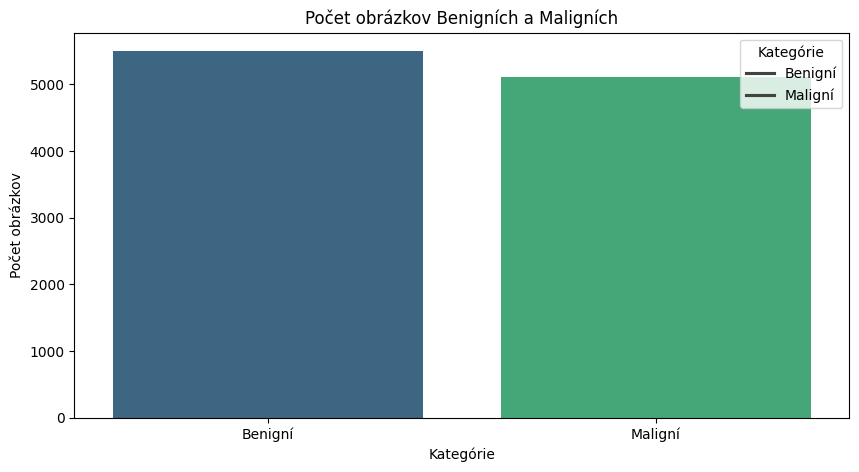

In [ ]:
# Počet obrázkov pre každú kategóriu
counts = [len(arraye_benign), len(arraye_malign)]
categories = ['Benigní', 'Maligní']

# Histogram počet obrázkov Benigních a Maligních
plt.figure(figsize=(10, 5))
sns.barplot(x=categories, y=counts, palette='viridis')
plt.xlabel('Kategórie')
plt.ylabel('Počet obrázkov')
plt.title('Počet obrázkov Benigních a Maligních')

# Pridanie legendy
plt.legend(categories, loc='upper right', title="Kategórie")
plt.show()

In [ ]:
# Vytvorenie subsetu -> 
arraye_benign_subset = arraye_benign[:200]
arraye_malign_subset = arraye_malign[:200]

In [ ]:
labels_benign_subset = [0] * len(arraye_benign_subset)
labels_malign_subset = [1] * len(arraye_malign_subset)
X = np.array(arraye_benign_subset + arraye_malign_subset)
y = np.array(labels_benign_subset + labels_malign_subset)

In [ ]:
shapes = [x.shape for x in X]
print(set(shapes))

{(100, 100)}


C:\Users\LOLSCROL\AppData\Local\Temp\ipykernel_2120\3897138134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='viridis')


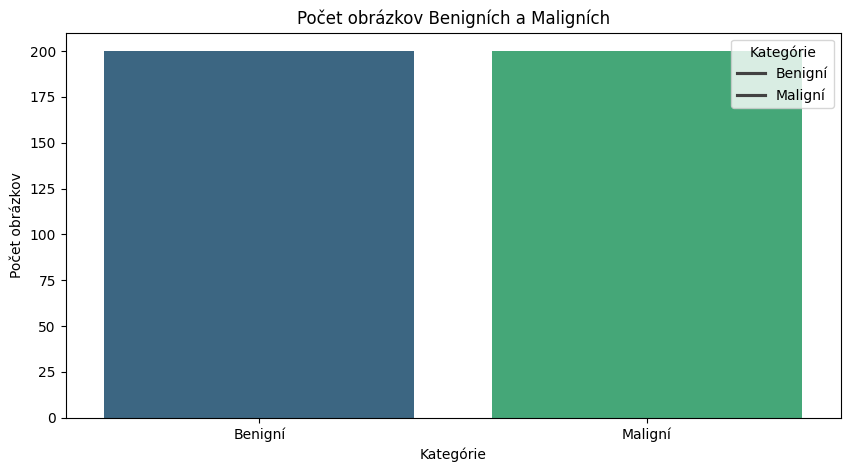

In [ ]:
# Počet obrázkov pre každú kategóriu
counts = [len(labels_benign_subset), len(labels_malign_subset)]
categories = ['Benigní', 'Maligní']

# Histogram počet obrázkov Benigních a Maligních
plt.figure(figsize=(10, 5))
sns.barplot(x=categories, y=counts, palette='viridis')
plt.xlabel('Kategórie')
plt.ylabel('Počet obrázkov')
plt.title('Počet obrázkov Benigních a Maligních')

# Pridanie legendy
plt.legend(categories, loc='upper right', title="Kategórie")
plt.show()

Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
print(f'Počet benigních v y_train: {np.sum(y_train==0)}')
print(f'Počet maligních v y_train: {np.sum(y_train==1)}')

total_pixels_benign = np.sum(X_train[y_train==0], axis=(1, 2))
total_pixels_malignant = np.sum(X_train[y_train==1], axis=(1, 2))
print(f'Celkový počet pixelov mačiek: {total_pixels_benign.sum()}')
print(f'Celkový počet pixelov psov: {total_pixels_malignant.sum()}')

Počet benigních v y_train: 160
Počet maligních v y_train: 160
Celkový počet pixelov mačiek: 273825468
Celkový počet pixelov psov: 231073258


In [ ]:
print(f"Tréningová množina: {len(X_train)} vzoriek")
print(f"Testovacia množina: {len(X_test)} vzoriek")
print(f"Validačná množina: {len(X_val)} vzoriek")

Tréningová množina: 320 vzoriek
Testovacia množina: 40 vzoriek
Validačná množina: 40 vzoriek


C:\Users\LOLSCROL\AppData\Local\Temp\ipykernel_2120\2800226831.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=count_train, palette='icefire', width=0.2).set_title('Class distribution in Training set', fontsize=15)
C:\Users\LOLSCROL\AppData\Local\Temp\ipykernel_2120\2800226831.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=count_val, palette='icefire', width=0.2).set_title('Class distribution in Validation set', fontsize=15)
C:\Users\LOLSCROL\AppData\Local\Temp\ipykernel_2120\2800226831.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

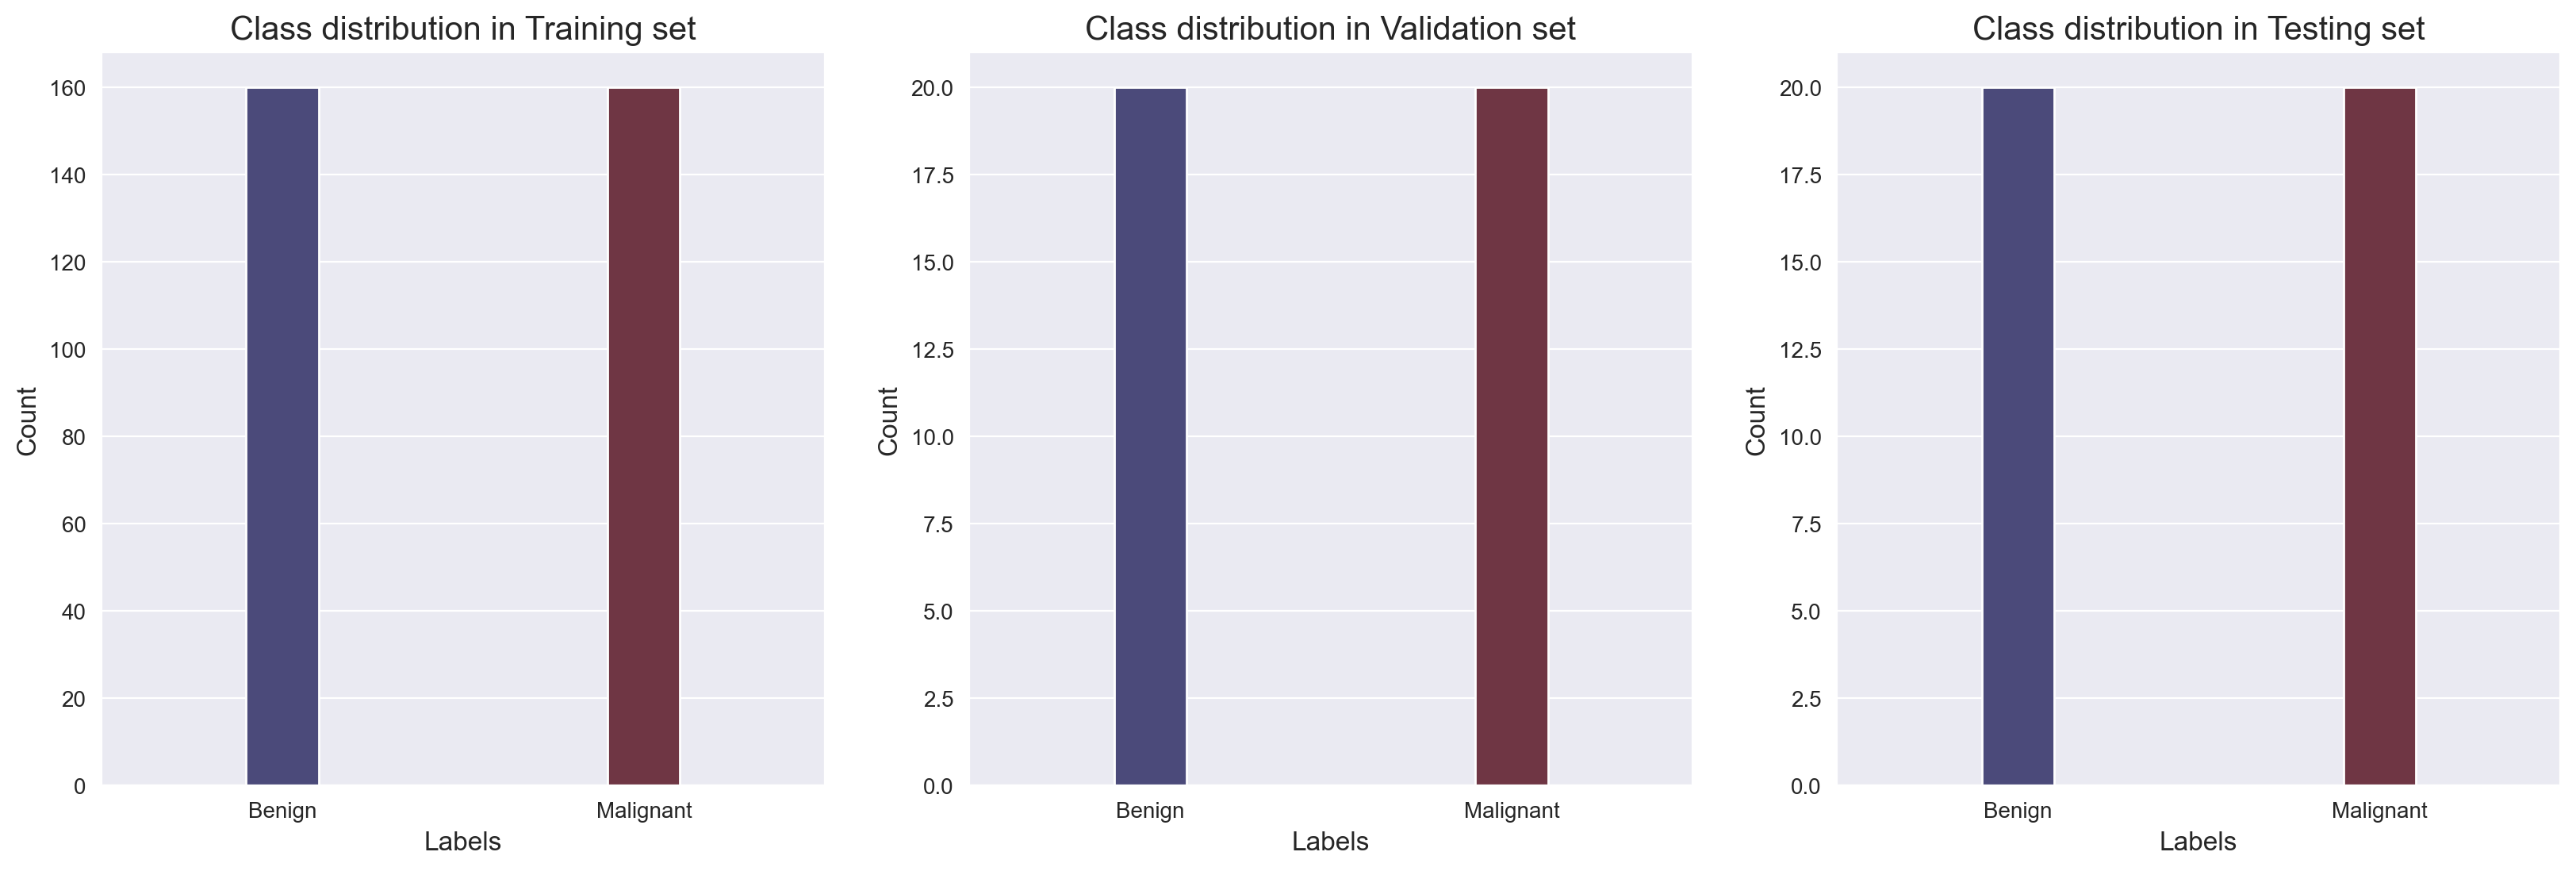

In [ ]:
labels = ['Benign','Malignant']

# Spočítanie výskytov v jednotlivých splitoch
label_train, count_train = np.unique(y_train, return_counts=True)
label_val, count_val = np.unique(y_val, return_counts=True)
label_test, count_test = np.unique(y_test, return_counts=True)

# Vytvorenie figure a vykreslenie grafov
plt.figure(figsize=(20, 6), dpi=200)
sns.set_style('darkgrid')

# Tréningová množina
plt.subplot(131)
sns.barplot(x=labels, y=count_train, palette='icefire', width=0.2).set_title('Class distribution in Training set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Validačná množina
plt.subplot(132)
sns.barplot(x=labels, y=count_val, palette='icefire', width=0.2).set_title('Class distribution in Validation set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Testovacia množina
plt.subplot(133)
sns.barplot(x=labels, y=count_test, palette='icefire', width=0.2).set_title('Class distribution in Testing set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Zobrazenie grafov
plt.show()